In [1]:
!wget https://gitlab.com/ntnu-tdat3025/regression/childgrowth-datasets/raw/master/length_weight.csv

--2023-08-29 13:45:24--  https://gitlab.com/ntnu-tdat3025/regression/childgrowth-datasets/raw/master/length_weight.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving gitlab.com (gitlab.com)... 2606:4700:90:0:f22e:fbec:5bed:a9b9, 172.65.251.78
Connecting to gitlab.com (gitlab.com)|2606:4700:90:0:f22e:fbec:5bed:a9b9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50016 (49K) [text/plain]
Saving to: ‘length_weight.csv’

length_weight.csv   100%[===================>]  48.84K  --.-KB/s    in 0.01s   

2023-08-29 13:45:24 (4.10 MB/s) - ‘length_weight.csv’ saved [50016/50016]



In [39]:
import torch
import matplotlib.pyplot as plt

In [102]:
with open("length_weight.csv") as f:
    data = [i.split(",") for i in f.readlines()]

lengths = [float(r[0]) for r in data[1:]]
weights = [float(r[1]) for r in data[1:]]

x_train = torch.tensor(lengths).reshape(-1, 1)
y_train = torch.tensor(weights).reshape(-1, 1)

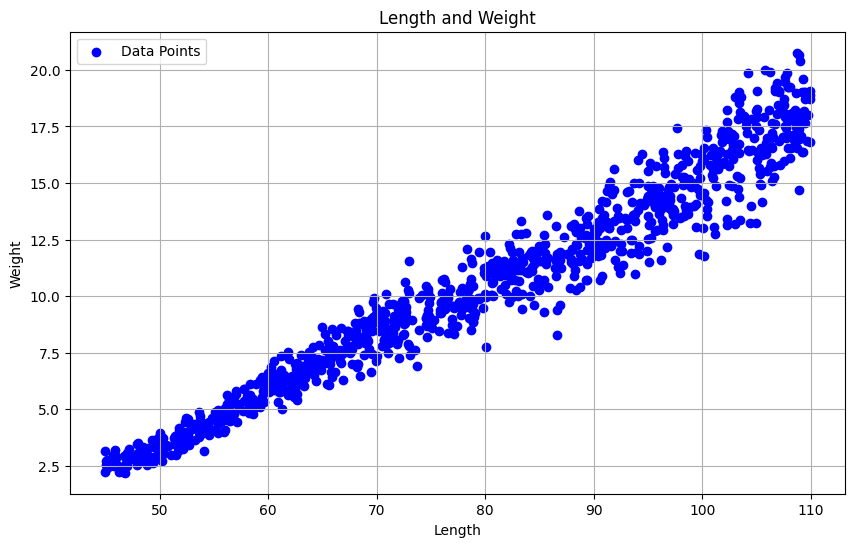

In [103]:
# plot
plt.figure(figsize=(10, 6))
plt.scatter(lengths, weights, c='blue', marker='o', label='Data Points')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('Length and Weight')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
class LinearRegressionModel:
    def __init__(self):
        self.W = tensor([[0.0]], requires_grad=True)
        self.b = tensor([[0.0]], requires_grad=True)

    def f(self, arg):
        return arg @ self.W + self.b

    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))  # Can also use torch.nn.functional.mse_loss(self.f(x), y) to possibly increase numberical stability

In [121]:
model = LinearRegressionModel()
optimizer = torch.optim.SGD([model.W, model.b], 0.0001)

for epoch in range(500_000):
    if (epoch + 1) % 100_000 == 0:
        print("Done:", epoch + 1)
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

Done: 99999
Done: 199999
Done: 299999
Done: 399999
Done: 499999


W = tensor([[0.2381]], requires_grad=True), b = tensor([[-8.4831]], requires_grad=True), loss = tensor(0.9943, grad_fn=<MeanBackward0>)


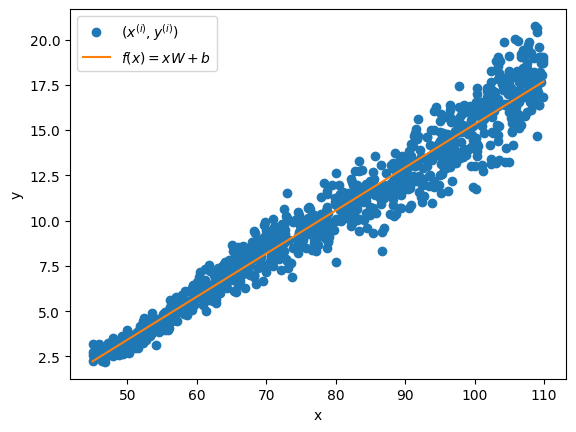

In [122]:
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

# Visualize result
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])  # x = [[1], [6]]]
plt.plot(x, model.f(x).detach(), label='$f(x) = xW+b$')
plt.legend()
plt.show()